In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Random Indicator

In [140]:
df = pd.read_csv('train.csv',usecols=['Survived','Age','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [141]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [142]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [143]:
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [100]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [101]:
x_train.head(2)

,Age,Fare,Age_imputed
331,45.5,28.5,45.5
733,23.0,13.0,23.0


In [102]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

In [103]:
x_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,33.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


In [104]:
x_test['Age_imputed'][x_test['Age_imputed'].isnull()]=x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [105]:
x_test

,Age,Fare,Age_imputed
709,NaN,15.2458,36.0
439,31.0,10.5000,31.0
840,20.0,7.9250,20.0
720,6.0,33.0000,6.0
39,14.0,11.2417,14.0
...,...,...,...
433,17.0,7.1250,17.0
773,NaN,7.2250,29.0
25,38.0,31.3875,38.0
84,17.0,10.5000,17.0


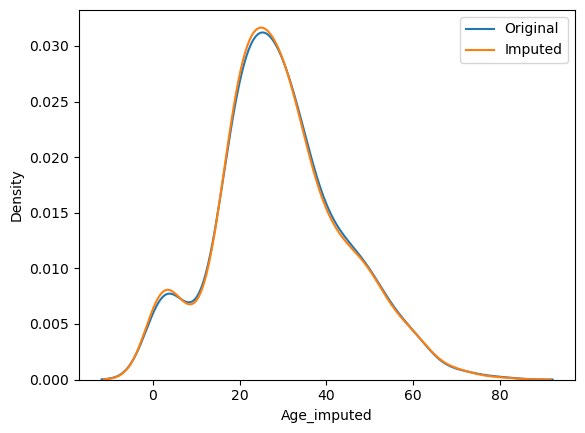

In [112]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label='Imputed',hist=False)

plt.legend()
plt.show()

In [114]:
x_train.cov()

,Age,Fare,Age_imputed
Age,210.251707,71.580633,210.251707
Fare,71.580633,2700.831981,55.504000
Age_imputed,210.251707,55.504000,211.373558


<AxesSubplot:>

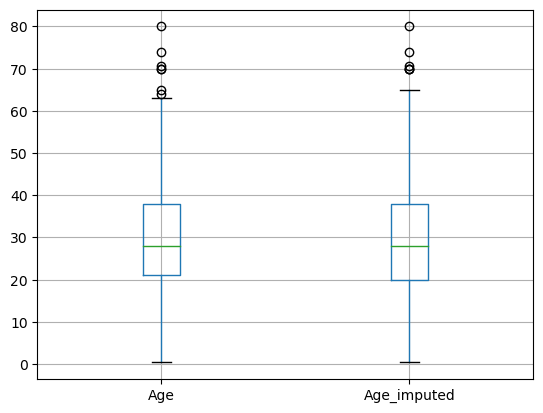

In [117]:
x_train[['Age','Age_imputed']].boxplot()

# Missing Indicator

In [124]:
from sklearn.impute import SimpleImputer

In [159]:
x_train

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750
...,...,...
106,21.0,7.6500
270,NaN,31.0000
860,41.0,14.1083
435,14.0,120.0000


In [146]:
si = SimpleImputer(add_indicator=True)

In [169]:
x_train_trf = si.fit(x_train)
x_test_trf = si1.transform(x_test)

In [149]:
x_train_trf

SimpleImputer(add_indicator=True)

In [150]:
x_train_trf = si.transform(x_train)

In [154]:
x_train_trf = pd.DataFrame(x_train_trf,columns=['Age','Fare','Age_Na'])
x_train_trf.isnull().sum()

Age       0
Fare      0
Age_Na    0
dtype: int64

In [168]:
si1 = SimpleImputer()
x_train = si1.fit_transform(x_train)
x_test = si1.transform(x_test)

In [136]:
x_test_trf = si.transform(x_test)

In [132]:
from sklearn.linear_model import LogisticRegression

In [156]:
#clf = LogisticRegression().fit(x_train,y_train)
clf_trf = LogisticRegression().fit(x_train_trf,y_train)

In [163]:
clf = LogisticRegression().fit(x_train,y_train)

In [172]:
# y_pred = clf.predict(x_test)
# y_pred_trf = clf_trf.predict(x_test_trf)

# By using gird search cv we can select automatically parameters

In [ ]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])


In [ ]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [ ]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

In [ ]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")